# **Conformal Geoemtric Algebra - Visualizing Transformations**

We've shown how to plot the elements (e.g. points, planes, circles, spheres, vectors).
Now let's visualize how some transformations work

In [1]:
using Pkg
Pkg.activate(".")

include("auxiliary.jl")
include("constructions.jl")
include("plottingfunctions.jl")

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`


WebIO._IJuliaInit()

plotsphere

## 1. Plotting Lines and Points

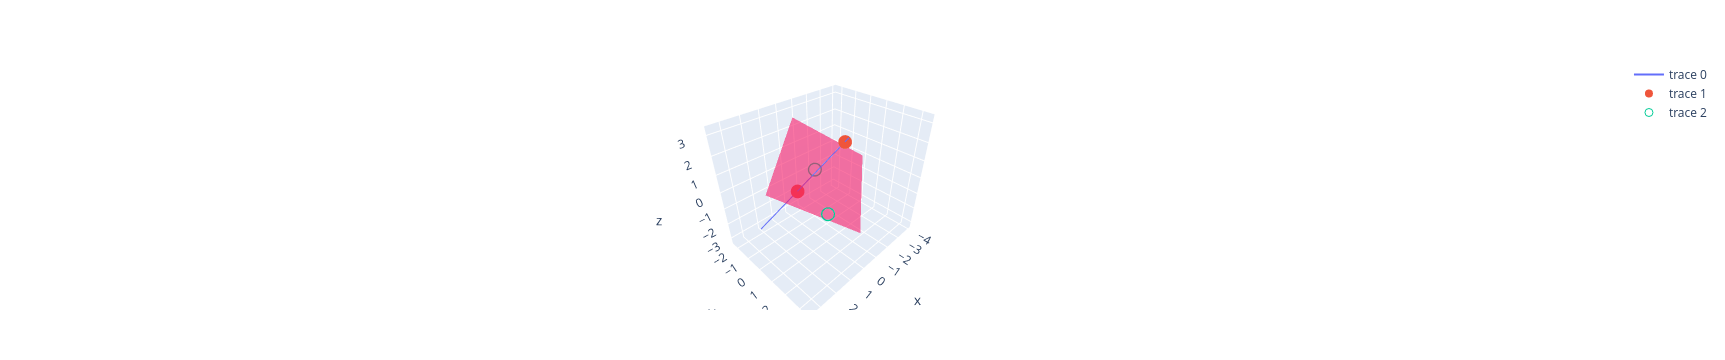

In [2]:
x1 = point(1,0,0)
x2 = point(0,2,3)
p  = point(2,3,1)
q  = point(-2,-2,-1)
p_q = p ∧ q

l = line(x1,x2)

p1 = plotpoint([x1,x2])
p2 = plotline(l,4,anchor=x1)

p3 = plotpointpair(p_q)

n = (getblades(x2) - getblades(x1))
n = n / norm(n)
Π = plane(n, norm(getblades(x1)))
p4 = plotplane(Π, 4)

plot([p2,p1, p3, p4])

### Applying Rotation to Point Pair

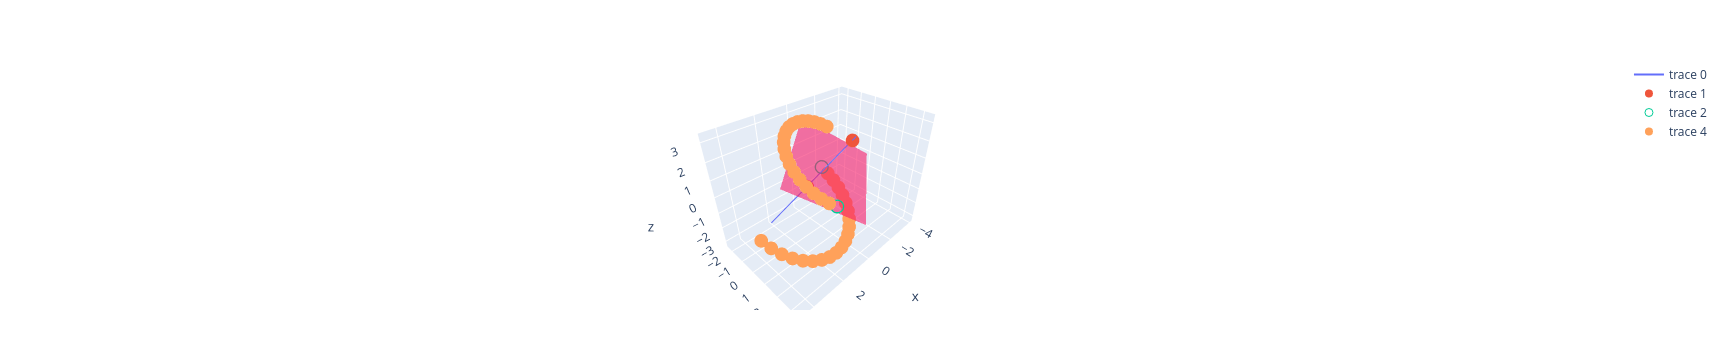

In [3]:
E = translate(edual(n),x1)

ϕ = π/4
R = exp(-E * ϕ/10)

R*x1*inv(R) ≈ x1
R*x2*inv(R) ≈ x2


p_q = p ∧ q
rotated_pairs = []
for i in 1:20
    p_q = R* p_q *inv(R)
    Rp, Rq = extractpairpoints(p_q)
    push!(rotated_pairs,[Rp,Rq]...)
end

p5 = plotpoint(rotated_pairs)

p = plot([p2,p1, p3, p4,p5])

### Rotation to Circle

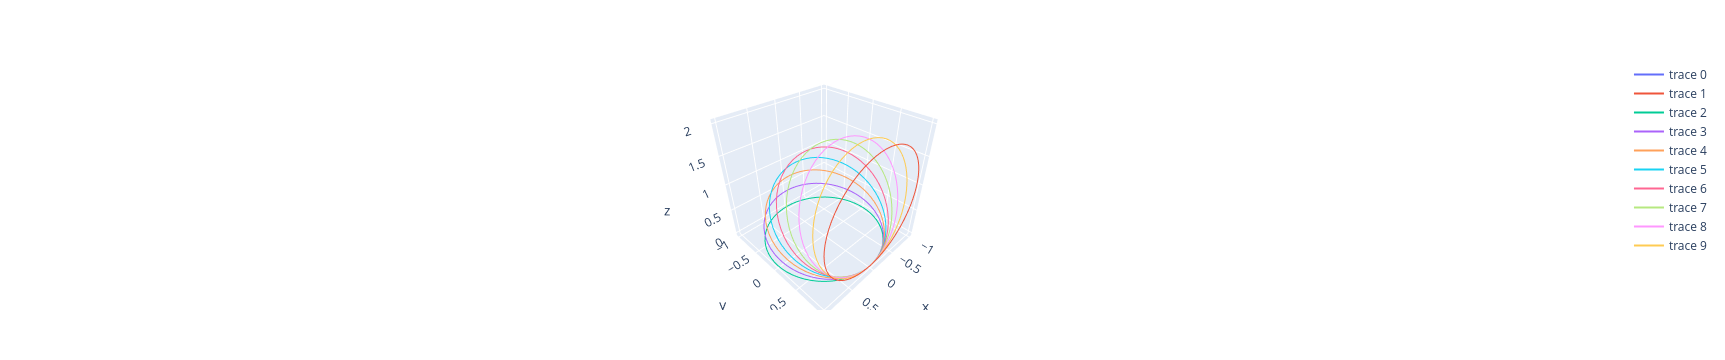

In [4]:
n = cl.e3
C = circle(no, n,1)
E = translate(edual(cl.e1),[0,1,0])


pc = plotcircle(C)
prc = [pc]

for ϕ in vcat(π/4, 0:0.1:π/4)
    rC = rotate(C, E, ϕ)
    push!(prc, plotcircle(rC))
end

plot(prc)

### Translating Set of Points

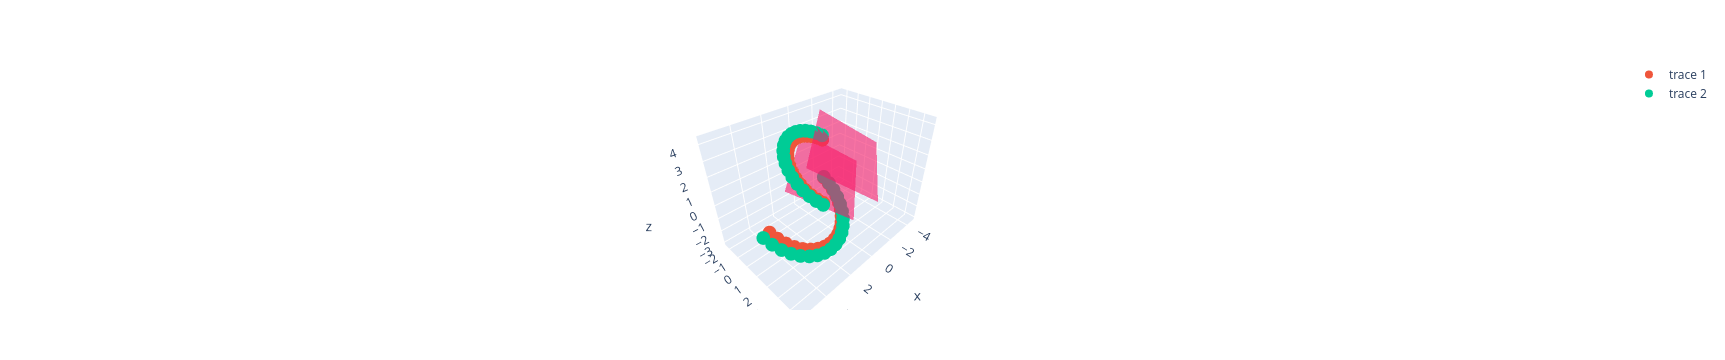

In [5]:
translated_pairs = translate.(rotated_pairs[:],Ref([1,1,1]))
translated_Π     = translate(Π, [2,2,2])

p6 = plotpoint(translated_pairs)
p7 = plotplane(translated_Π, 4)
p = plot([p4, p5, p6, p7])

### Reflecting Objects

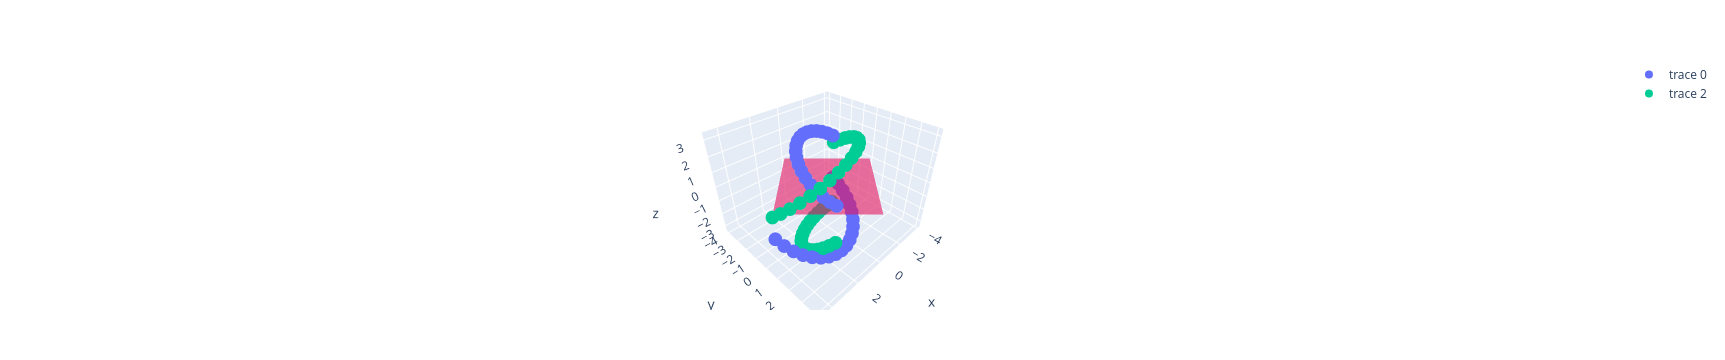

In [6]:
reflect(x, Π) = cdual(Π) * grin(x) * inv(cdual(Π))

mirror = cdual(cl.e3)
reflected_pairs = reflect.(rotated_pairs,Ref(mirror))

p8 = plotplane(mirror, 4)
p9 = plotpoint(reflected_pairs)

plot([p5,p8,p9])

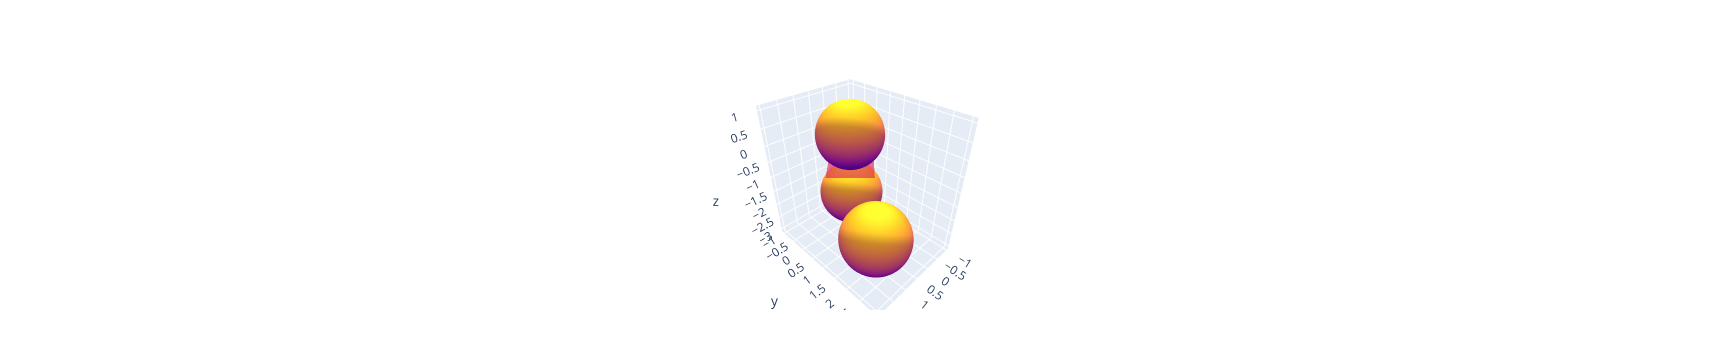

In [7]:
Σ  = sphere()
Π  = plane(cl.e3,-1)
rΣ = reflect(Σ, Π)
tΣ = translate(rΣ,[1,2,0])

psphere  = plotsphere(rΣ)
preflect = plotsphere(Σ)
ptransl = plotsphere(tΣ)
pplane   = plotplane(Π)
plot([psphere, pplane, preflect, ptransl])

### Scaling Objects

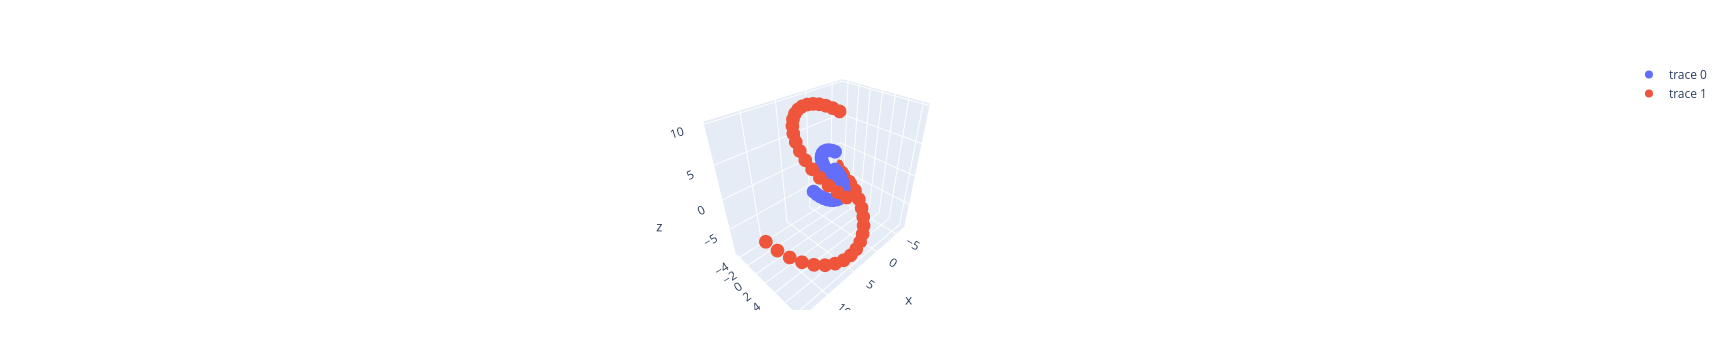

In [8]:
function scale(x,α=1)
    γ = log(α)
    S = exp(γ * no ∧ n∞ /2)
    scaled_x = S * x * inv(S)
    α  = - n∞ ⋅ scaled_x # The point weight
    getblades(scaled_x/α)
end

# p1 = plotpoint(x)
# p2 = plotpoint(scaled_x)
scaled_pairs = scale.(rotated_pairs,Ref(3))
p1 = plotpoint(rotated_pairs)
p2 = plotpoint(scaled_pairs)

plot([p1,p2])

### Transversion

In [67]:
t  = cl.e1
Tr = exp(no ∧ t)
x = point(2,3,1)

transverse(t,x, a = [0,0,0]) = translate(exp(no ∧ t),a) * x * inv(translate(exp(no ∧ t), a))

xs = Array{Any}([x])
for i in 1:5
    xt = transverse(t,xs[i],[0,0,0])
    t = t + cl.e1
    push!(xs, xt)
end
p1 = plotpoint(xs, opacity=0.5)
plot([p1])

data: [
  "scatter3d with fields mode, opacity, type, x, y, and z"
]

layout: "layout with fields margin and template"